In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance/StudentPerformance.csv


In [2]:
df = pd.read_csv("/kaggle/input/student-performance/StudentPerformance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [5]:
activities=df['Extracurricular Activities'].value_counts()

In [6]:
activities

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

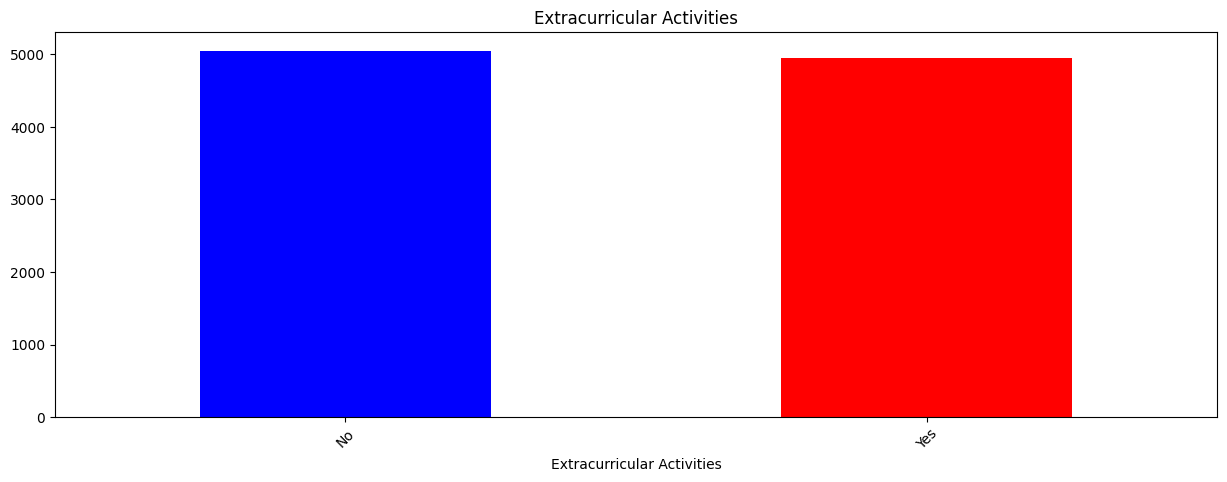

In [7]:
activities.plot(kind='bar',color=['blue','red'],figsize=(15,5))
plt.title('Extracurricular Activities')
plt.xlabel('Extracurricular Activities')
plt.xticks(rotation = 45)
plt.show()

In [8]:
average_hours_studied = df['Hours Studied'].mean()

In [9]:
average_hours_studied

np.float64(4.9929)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn. compose import ColumnTransformer
from sklearn. preprocessing import OneHotEncoder,StandardScaler 
from sklearn.impute import SimpleImputer
from sklearn .metrics import mean_absolute_error,mean_squared_error,r2_score


In [11]:
x = df.drop (['Performance Index'],axis = 1 )
y = df['Performance Index']

In [12]:
numerical_cols = x.select_dtypes (include=['int64','float64']).columns.tolist()

In [13]:
categorical_cols= x.select_dtypes(include=['object']).columns.tolist()

In [14]:
from sklearn .pipeline import Pipeline

In [15]:
numerical_transformer = Pipeline(steps=[
                                 ('imputer',SimpleImputer(strategy='mean')),
                                  ('Scaler',StandardScaler())       
])

In [16]:
categorical_transformer = Pipeline (steps=[
                                  ('imputer ',SimpleImputer(strategy='most_frequent')),
                                   ('onehot',OneHotEncoder(handle_unknown='ignore'))
    
])

In [17]:
preprocessor = ColumnTransformer(transformers=[
                                ('num',numerical_transformer,numerical_cols),
                                ('cat',categorical_transformer,categorical_cols)
])

In [18]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state= 42 )

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model_linear = Pipeline(steps=[
                ('pre',preprocessor ),('reg',LinearRegression())
])

In [21]:
model_linear.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer ',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Extracurricular '
                                                   'Activities'])])),
                ('reg', LinearRegression())])

In [22]:
linear_prediction = model_linear.predict(X_test)
print(f'Accuracy:{r2_score(linear_prediction,y_test):.4f}')

Accuracy:0.9887


i am satisfied for this accuracy


In [23]:
from sklearn .tree import DecisionTreeRegressor

In [24]:
model_2 = Pipeline(steps=[
          ('pre',preprocessor),('reg',DecisionTreeRegressor(max_depth=5,random_state=42))
])

In [25]:
model_2.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer ',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Extracurricular '
                                                   'Activities'])])),
                ('reg', DecisionTreeRegressor(max_depth=5, random_state=42))])

In [26]:
decisiontree_prediction = model_2.predict(X_test)

print(f'Accuracy:{r2_score(decisiontree_prediction,y_test):4f}')

Accuracy:0.962537


In [27]:
from xgboost import XGBRegressor

In [28]:
model_3 = Pipeline(steps=[
           ('pre',preprocessor),('reg',XGBRegressor(n_estimators=100,learning_rate = 0.1,random_state=42))
])

In [29]:
model_3.fit(X_train,y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer ',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ext...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [30]:
xgboost_prediction = model_3.predict(X_test)

print(f'Accuracy:{r2_score(xgboost_prediction,y_test):4f}')

Accuracy:0.988041
